<a href="https://colab.research.google.com/github/dudns1234/Data_Analysis/blob/master/04_%ED%8A%B8%EB%A6%AC%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 불필요한 경고 메시지 삭제
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
# 데이터 불러오기

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
  iris_data.data,
  iris_data.target,
  test_size=0.2,
  random_state=11
)

# 결정 트리 모델 생성

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

# Graphviz 시각화
- 트리 모델이 어떻게 훈련을 했는지를 시각화

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
    dt_clf, # 시각화 할 모델
    out_file = "tree.dot", # 시각화 결과물을 저장할 파일 경로
    class_names = iris_data.target_names, # 문자열로 된 클래스들의 이름
    feature_names = iris_data.feature_names, # 각 특성(feature)의 이름
    impurity = True,
    filled = True
)

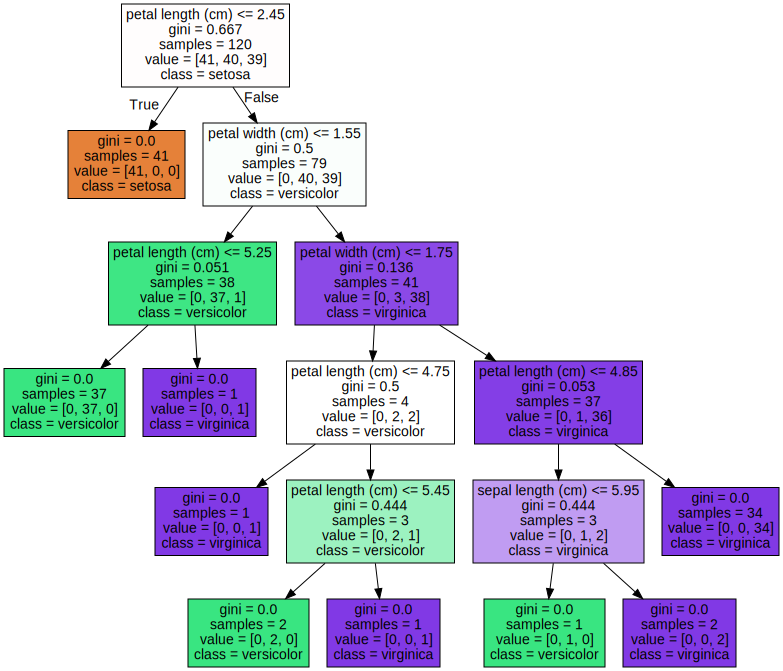

In [ ]:
import graphviz

with open('tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

# 정확도 확인

In [ ]:
from sklearn.metrics import accuracy_score

train_pred = dt_clf.predict(X_train) # 알고 있는 데이터에 대한 예측
test_pred  = dt_clf.predict(X_test)  # 새로 보는 데이터에 대한 예측

print("훈련 세트에 대한 점수 : {:.3f}".format(accuracy_score(y_train, train_pred)))
print("테스트 세트에 대한 점수 : {:.3f}".format(accuracy_score(y_test, test_pred)))

훈련 세트에 대한 점수 : 1.000
테스트 세트에 대한 점수 : 0.867


## max_depth를 이용한 질문의 깊이 제어

In [ ]:
dt_clf_depth_2 = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)

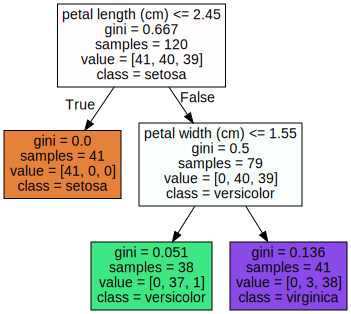

In [ ]:
export_graphviz(
    dt_clf_depth_2, # 시각화 할 모델
    out_file = "tree.dot", # 시각화 결과물을 저장할 파일 경로
    class_names = iris_data.target_names, # 문자열로 된 클래스들의 이름
    feature_names = iris_data.feature_names, # 각 특성(feature)의 이름
    impurity = True,
    filled = True
)

import graphviz

with open('tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

In [ ]:
train_pred = dt_clf_depth_2.predict(X_train) # 알고 있는 데이터에 대한 예측
test_pred  = dt_clf_depth_2.predict(X_test)  # 새로 보는 데이터에 대한 예측

print("훈련 세트에 대한 점수 : {:.3f}".format(accuracy_score(y_train, train_pred)))
print("테스트 세트에 대한 점수 : {:.3f}".format(accuracy_score(y_test, test_pred)))

훈련 세트에 대한 점수 : 0.967
테스트 세트에 대한 점수 : 0.867


# 트리의 결정 경계와 복잡도에 따른 과대적합/과소적합

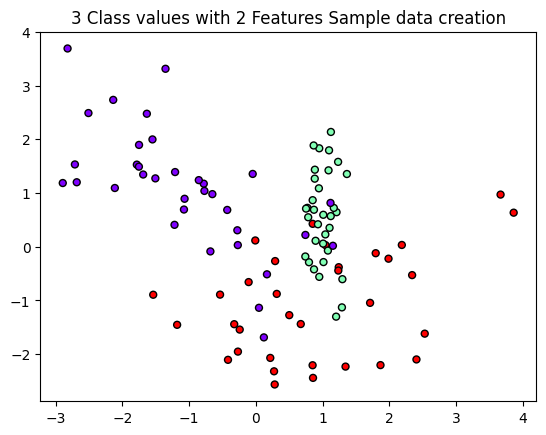

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성.
X_features, y_labels = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_classes=3,
    n_clusters_per_class=1,
    random_state=0
)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨.
plt.scatter(
    X_features[:, 0],
    X_features[:, 1],
    marker='o',
    c=y_labels,
    s=25,
    cmap='rainbow',
    edgecolor='k'
)
plt.show()

In [ ]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

# 기본 결정 트리 확인

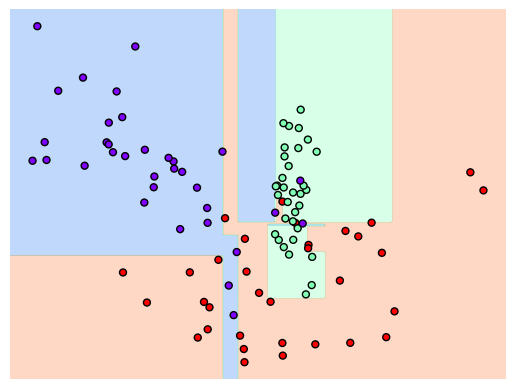

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 하이퍼 파라미터를 이용해 복잡도를 조절하지 않은 의사결정나무z 모델은 항상 과대적합이다.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)

visualize_boundary(dt_clf, X_features, y_labels)

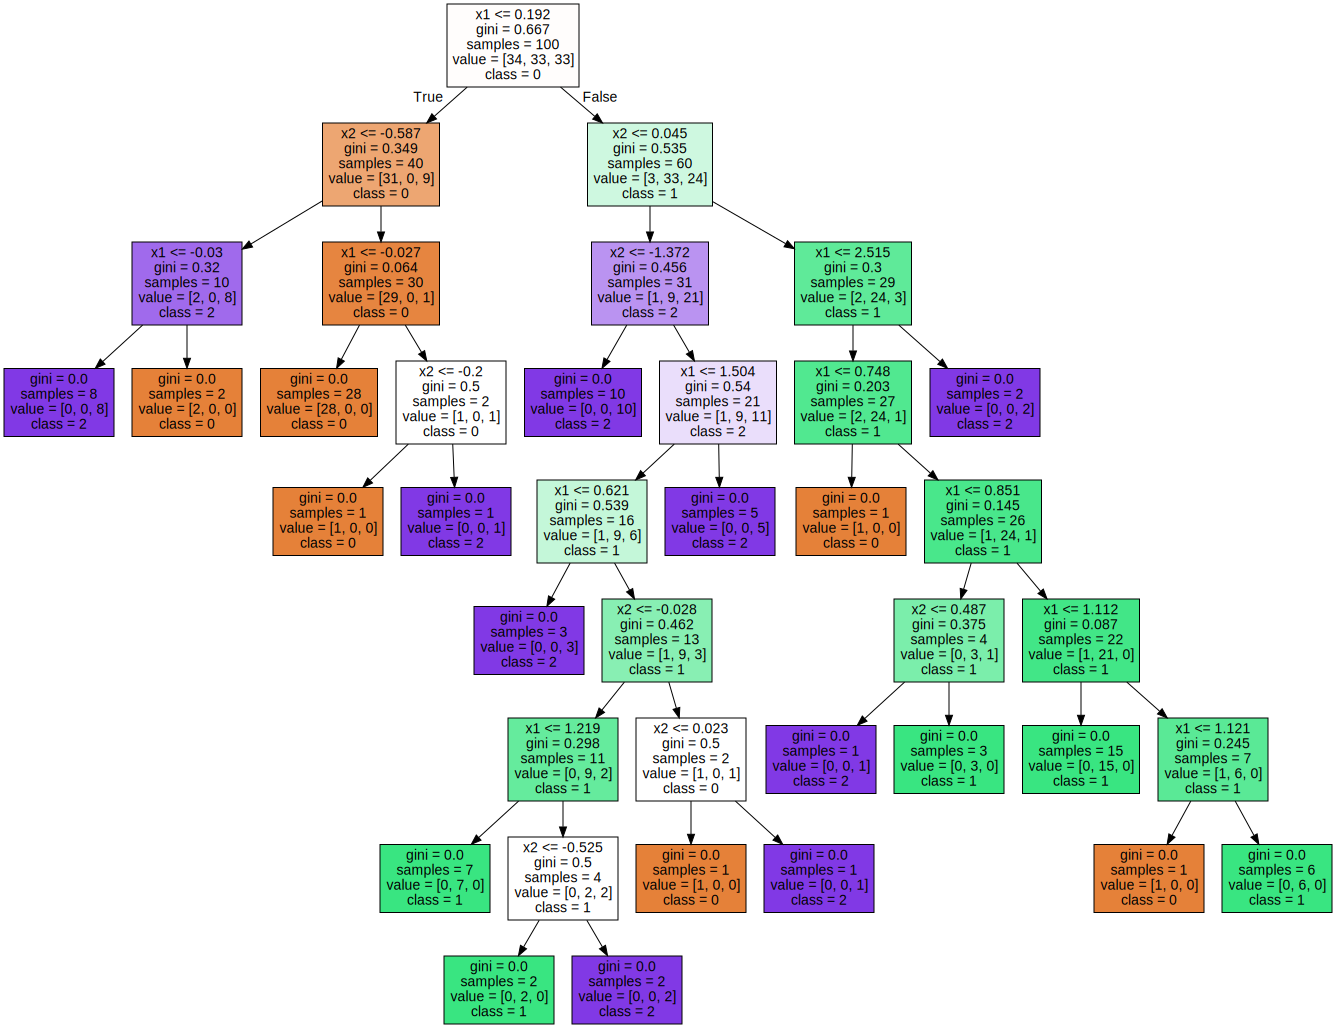

In [ ]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=["0", "1", "2"], feature_names=["x1", "x2"], impurity=True, filled=True)
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## max_depth 조절하기

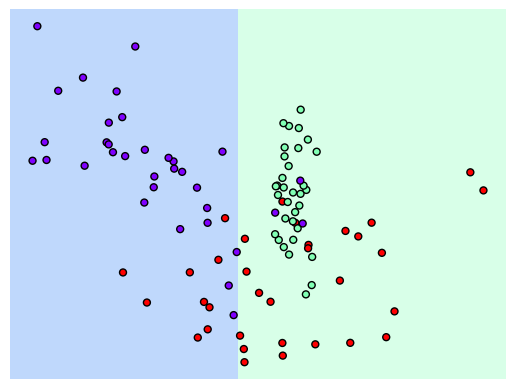

In [ ]:
# 나무의 최대 깊이를 1로 설정
dt_clf = DecisionTreeClassifier(max_depth=1).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

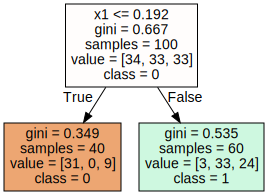

In [ ]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=["0", "1", "2"], feature_names=["x1", "x2"], impurity=True, filled=True)
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

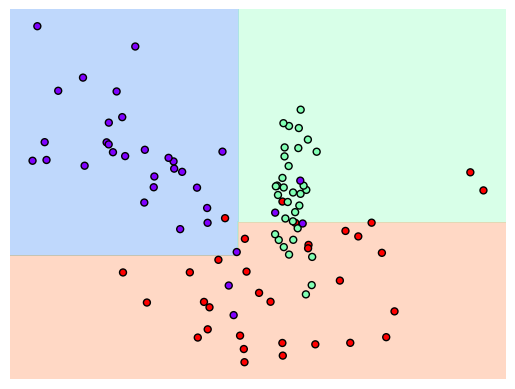

In [ ]:
# 나무의 최대 깊이를 2로 설정
dt_clf = DecisionTreeClassifier(max_depth=2).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

# 특성 중요도
- 어느 특성이 노드의 균일함에 많이 기여 했는가

In [ ]:
dt_clf_iris = DecisionTreeClassifier().fit(X_train,y_train)
dt_clf_iris.feature_importances_

array([0.03334028, 0.00833507, 0.53823268, 0.42009198])

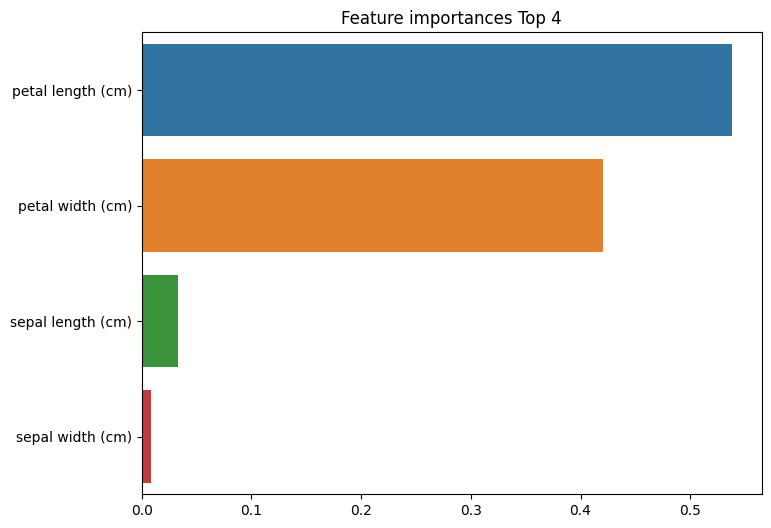

In [ ]:
import pandas as pd
def plot_feature_importance(model, columns, limit=None):
  import seaborn as sns

  ftr_importances_values = model.feature_importances_
  # Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
  ftr_importances = pd.Series(ftr_importances_values, index=columns  )
  # 중요도값 순으로 Series를 정렬
  ftr_top = ftr_importances.sort_values(ascending=False)[:limit]
  plt.figure(figsize=(8,6))
  plt.title(f'Feature importances Top {len(columns) if limit == None else limit}')
  sns.barplot(x=ftr_top , y = ftr_top.index)
  plt.show()

plot_feature_importance(dt_clf_iris, iris_data.feature_names)